<a href="https://colab.research.google.com/github/info-paradox/Assignments/blob/main/Assignment_Weak_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Weak 2 Assignment

In [91]:
import numpy as np
import time
import math
import pandas as pd

##1.Reading from Dataset

In [97]:
#readomg data from  the csv file
df=pd.read_csv('/content/winemag-data-assignment-2.csv')


##2.Dataframe information and describtion

In [93]:
df.describe()

,Unnamed: 0,points,price
count,5251.000000,5224.000000,4895.000000
mean,2625.000000,88.239472,35.039837
std,1515.977462,2.933020,51.515098
min,0.000000,80.000000,4.000000
25%,1312.500000,86.000000,16.500000
50%,2625.000000,88.000000,25.000000
75%,3937.500000,90.000000,40.000000
max,5250.000000,100.000000,1900.000000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5251 entries, 0 to 5250
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5251 non-null   int64  
 1   country                5248 non-null   object 
 2   description            5251 non-null   object 
 3   designation            3698 non-null   object 
 4   points                 5224 non-null   float64
 5   price                  4895 non-null   float64
 6   province               5248 non-null   object 
 7   region_1               4419 non-null   object 
 8   region_2               2078 non-null   object 
 9   taster_name            4172 non-null   object 
 10  taster_twitter_handle  3991 non-null   object 
 11  title                  5251 non-null   object 
 12  variety                5250 non-null   object 
 13  winery                 5250 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 574.5+

##3.Drop the unwanted columns

In [95]:
columns_to_del=['description','region_2','taster_name','taster_twitter_handle','title','province']


In [98]:
print(df[:0])
df.drop(columns=columns_to_del,inplace=True)
print(df[:0])

Empty DataFrame
Columns: [Unnamed: 0, country, description, designation, points, price, province, region_1, region_2, taster_name, taster_twitter_handle, title, variety, winery]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, country, designation, points, price, region_1, variety, winery]
Index: []


##4.Convert text values into numeric ones

In [99]:
def enum(w):
  w=set(w)
  print(w)
  w_to_n={}
  n_to_w={}
  for i,w in enumerate(w):
    w_to_n[w]=i
    n_to_w[i]=w
  return w_to_n,n_to_w

def word_to_number(array):
  arr_list=[]
  w_to_n,n_to_w=enum(array)
  for item in array:
    arr_list.append(w_to_n[item])
  return (arr_list)


In [101]:
new_df=df.copy()
new_df[:0]

,Unnamed: 0,country,designation,points,price,region_1,variety,winery


In [102]:
#get the numeric representation of the following cols
list_country=word_to_number(df['country'])
list_region=word_to_number(df['region_1'])
list_variety=word_to_number(df['variety'])
list_winery=word_to_number(df['winery'])

{nan, 'Portugal', 'Israel', 'Czech Republic', 'Spain', 'Hungary', 'Turkey', 'Lebanon', 'Romania', 'France', 'Luxembourg', 'Austria', 'Italy', 'US', 'Germany', 'Croatia', 'New Zealand', 'England', 'Argentina', 'South Africa', 'Chile', 'Australia', 'Uruguay', 'Mexico', 'Slovenia', 'Serbia', 'Greece', 'Canada', 'Georgia'}
{nan, 'Knights Valley', 'Lazio', 'Bardolino Classico', 'Juliénas', 'Monferrato', 'Clarksburg', 'Calistoga', 'Washington', 'Columbia Gorge (WA)', 'Ancient Lakes', 'Patagonia', 'Agrelo', 'Valpolicella Superiore Ripasso', 'Maremma', 'Viré-Clessé', 'Faro', 'Southern Oregon', 'Valtellina Superiore', 'Forlì', 'Uclés', 'Coteaux Bourguignons', 'Saint-Joseph', 'Pemberton', 'Augusta', 'Adelaide Plains', 'Calaveras County', 'Valdeorras', 'Langhorne Creek', 'Temecula', 'Napa County', 'Montagne-Saint-Émilion', 'Rosé de Loire', 'Cole Ranch', 'Valdobbiadene Superiore di Cartizze', 'Chiles Valley', 'North Coast', 'Monica di Sardegna', 'Coombsville', 'New Mexico', 'Cornas', 'Cayuga Lake'

In [103]:
#replace the strings with its numeric representation
new_df['country']=list_country
new_df['region_1']=list_region
new_df['variety']=list_variety
new_df['winery']=list_winery

In [104]:
new_df.head()

,Unnamed: 0,country,designation,points,price,region_1,variety,winery
0,0,12,Vulkà Bianco,87.0,NaN,406,209,684
1,1,1,Avidagos,87.0,15.0,0,24,2793
2,2,13,NaN,87.0,14.0,340,106,1829
3,3,13,Reserve Late Harvest,87.0,13.0,553,115,3338
4,4,13,Vintner's Reserve Wild Child Block,87.0,65.0,340,70,907


##5.Fill missing values in price with mean and in points with median

In [ ]:
df.sort_values(by='price',na_position='first',ascending=True)#cheching the occurance of nan by sorting

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
13,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
30,30,France,Red cherry fruit comes laced with light tannin...,Nouveau,86.0,NaN,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone
31,31,Italy,Merlot and Nero d'Avola form the base for this...,Calanìca Nero d'Avola-Merlot,86.0,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta
32,32,Italy,"Part of the extended Calanìca series, this Gri...",Calanìca Grillo-Viognier,86.0,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,347,Germany,"Dusty, saffron-spiced earthiness is juxtaposed...",Kiedrich Gräfenberg Trockenbeerenauslese,97.0,775.0,Rheingau,NaN,NaN,Anna Lee C. Iijima,NaN,Robert Weil 2014 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil
1566,1566,France,"Such a generous and ripe wine, with a dark cor...",NaN,97.0,1100.0,Bordeaux,Pessac-Léognan,NaN,Roger Voss,@vossroger,Château La Mission Haut-Brion 2009 Pessac-Léo...,Bordeaux-style Red Blend,Château La Mission Haut-Brion
1571,1571,France,"Solid, very structured, packed with dense and ...",NaN,96.0,1200.0,Bordeaux,Pessac-Léognan,NaN,Roger Voss,@vossroger,Château Haut-Brion 2009 Pessac-Léognan,Bordeaux-style Red Blend,Château Haut-Brion
1575,1575,France,"The purest Cabernet Sauvignon fruit, with dark...",NaN,96.0,1300.0,Bordeaux,Pauillac,NaN,Roger Voss,@vossroger,Château Mouton Rothschild 2009 Pauillac,Bordeaux-style Red Blend,Château Mouton Rothschild


In [106]:
pr_mean=new_df['price'].mean()
po_median=df['points'].median()
print(f'the value of price col mean is: {str(pr_mean)}')
print(f'the value of points col median is: {str(po_median)}')
#this is the replace operations
new_df['price'].replace(np.nan,pr_mean,inplace=True)
new_df['points'].replace(np.nan,po_median,inplace=True)

the value of price col mean is: 35.03983656792646
the value of points col median is: 88.0


In [107]:
new_df['price'][:3]

0    35.039837
1    15.000000
2    14.000000
Name: price, dtype: float64

In [108]:
df['points'][:2]

0    87.0
1    87.0
Name: points, dtype: float64

##6.Split the data into input/features X and output/target Y

In [109]:
x_features=new_df.sample(frac=0.8,random_state=25) #80% of the dataset
y_targets=new_df.drop(x_features.index) # the remaining of dataset

print(f'no. of x features is: {x_features.shape[0]}')#the number of rows
print(f'no. of y targets is: {y_targets.shape[0]}')

no. of x features is: 4201
no. of y targets is: 1050


In [110]:
print(x_features[:1]) #just displaying first rows for testing
print(y_targets[:1])

      Unnamed: 0  country designation  points  price  region_1  variety  winery
1270        1270       13         NaN    85.0   34.0       461      157    1641
    Unnamed: 0  country     designation  ...  region_1  variety  winery
10          10       13  Mountain Cuvée  ...       461      157    2158

[1 rows x 8 columns]


##7.Print the describe and info of the dataset by the discriptive tools

In [113]:
print(f'the description of the mod-dataframe is\n {new_df.describe()}')
print(f'the information of the mod-dataframe is\n {new_df.info} \nand the mod is : \n{new_df.mode()}')


the description of the mod-dataframe is
         Unnamed: 0      country  ...      variety       winery
count  5251.000000  5251.000000  ...  5251.000000  5251.000000
mean   2625.000000    11.837745  ...   123.225290  1755.139212
std    1515.977462     4.311088  ...    74.477185  1018.696795
min       0.000000     0.000000  ...     0.000000     0.000000
25%    1312.500000     9.000000  ...    70.000000   866.000000
50%    2625.000000    13.000000  ...   123.000000  1746.000000
75%    3937.500000    13.000000  ...   185.000000  2637.500000
max    5250.000000    28.000000  ...   273.000000  3520.000000

[8 rows x 7 columns]
the information of the mod-dataframe is
 <bound method DataFrame.info of       Unnamed: 0  country  ... variety  winery
0              0       12  ...     209     684
1              1        1  ...      24    2793
2              2       13  ...     106    1829
3              3       13  ...     115    3338
4              4       13  ...      70     907
...          ..

In [114]:
print(f'the description of the X-feature is\n {x_features.describe()}')
print(f'the description of the Y-targets is\n {y_targets.describe()}')
print(f'the information of the x-feature is\n {x_features.info} \nand the mod is : \n{x_features.mode()}')
print(f'the information of the Y-targets is\n {y_targets.info} \nand the mod is : \n{y_targets.mode()}')


the description of the X-feature is
         Unnamed: 0      country  ...      variety       winery
count  4201.000000  4201.000000  ...  4201.000000  4201.000000
mean   2617.865984    11.842657  ...   123.323494  1745.784099
std    1515.594630     4.298920  ...    74.722619  1017.318456
min       0.000000     0.000000  ...     0.000000     0.000000
25%    1310.000000     9.000000  ...    70.000000   858.000000
50%    2606.000000    13.000000  ...   117.000000  1719.000000
75%    3922.000000    13.000000  ...   185.000000  2632.000000
max    5250.000000    28.000000  ...   273.000000  3520.000000

[8 rows x 7 columns]
the description of the Y-targets is
         Unnamed: 0      country  ...      variety       winery
count  1050.000000  1050.000000  ...  1050.000000  1050.000000
mean   2653.542857    11.818095  ...   122.832381  1792.568571
std    1517.895246     4.361441  ...    73.520958  1023.824020
min      10.000000     0.000000  ...     1.000000     1.000000
25%    1326.250000    

##8.Plot histogram with plot size of 10

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea8610b6d0>,
      dtype=object)

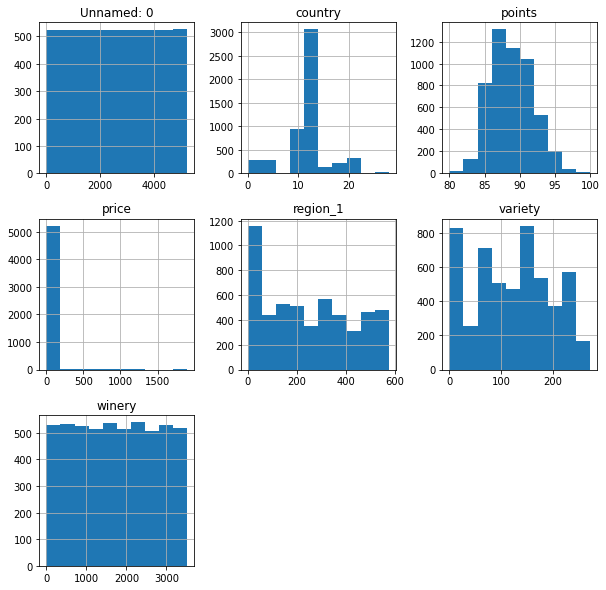

In [115]:
new_df.hist(figsize=(10,10))

##9.Save the modified dataframe to csv file

In [ ]:
new_df.to_csv('modified_dataframe.csv')